In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
Credit = pd.read_csv('./Data/creditcard.csv')

In [3]:
Credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Credit.shape

(284807, 31)

In [5]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# Check if there's any missing value
pd.isnull(Credit).any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

### No missing value for any of the variables. Use V1 - V28 as predictors for fraud detection.

In [7]:
Credit = Credit.drop(['Time', 'Amount'],axis=1)
Credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


## The predictors are all coded and transformed after PCA. The correlation matrix below confirms this.

In [8]:
Features = Credit.drop(['Class'],axis=1)
Features.corr().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
V1,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
V2,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
V3,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
V4,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
V5,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
V6,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
V7,0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
V8,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
V9,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
V10,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0


# Distribuions of Frauds and Non-frauds

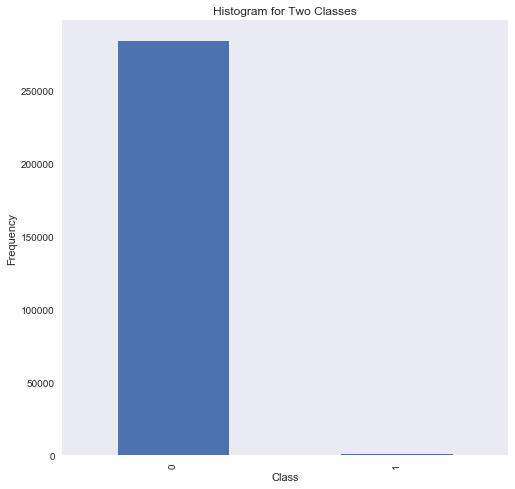

Number of each class
0    284315
1       492
Name: Class, dtype: int64


In [9]:
plt.figure(figsize=(8,8))
count_classes = pd.value_counts(Credit['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histogram for Two Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()
print("Number of each class")
print(Credit['Class'].value_counts())

In [10]:
#Normalized distribution
Credit['Class'].value_counts(normalize=True)[1]

0.001727485630620034

# Methodology

## 1. Baseline (No resapmling)
## 2. Undersample (20 balanced subsets)
## 3. Oversample (Random Oversampling, SMOTE, ADASYN)

# Initialize Perforamce Trackers

In [11]:
#Baseline logistic regression and random forest
Base_log_test, Base_log_train, Base_rf_train, Base_rf_test = [], [], [], []

In [12]:
#Logistic regression and random forest with undersampling
U_log_train, U_rf_train = [], []  #training
U_log, U_RF = [], []   #test

In [13]:
#Logistic regression and random forest with oversampling (Random Oversamping, SMOTE, ADASYN)
RO_log_train, SMOTE_log_train, ADASYN_log_train = [], [], []   #training
RO_log, SMOTE_log, ADASYN_log = [], [], []     #test

# Test-train Split with Stratification

In [16]:
from sklearn.model_selection import train_test_split

seeds = [0, 55, 23, 107, 2870]

X = Credit.iloc[:, Credit.columns != 'Class']  
y = Credit.iloc[:, Credit.columns == 'Class']
X_train_total, X_test, y_train_total, y_test = train_test_split(X,y,test_size = 0.25, stratify=y, random_state = seeds[0])

y_true = y_test.Class.values.ravel()

## The stratification makes the proportions of fraud and non-fraud in the test set the same as the original test as shown below

In [17]:
print("Total training set counts:")
print(y_train_total.Class.value_counts())
print(y_train_total.Class.value_counts(normalize=True))

Total training set counts:
0    213236
1       369
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [18]:
print("Test set counts:")
print(y_test.Class.value_counts())
print(y_test.Class.value_counts(normalize=True))

Test set counts:
0    71079
1      123
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [19]:
number_records_fraud_train = len(y_train_total[y_train_total.Class == 1])
fraud_indices_train = np.array(y_train_total[y_train_total.Class == 1].index)
number_records_fraud_train

369

In [24]:
# This function generates scatter plot for variable V1 and V2 with different classes marked
def illustration(predictors, response, title='Scatter Plot'):
    
    plt.figure(figsize=(5,5))
    
    c0 = plt.scatter(predictors.V1[response.Class == 0], predictors.V2[response.Class == 0], 
                 label="Non-fraud", alpha=0.5)
    
    c1 = plt.scatter(predictors.V1[response.Class == 1], predictors.V2[response.Class == 1], 
                 label="Fraud", alpha=0.5)
    
    plt.title(title)
    plt.figlegend((c0, c1), ('Non-fraud', 'Fraud'), loc='lower center', ncol=2)
    
    return plt.show()

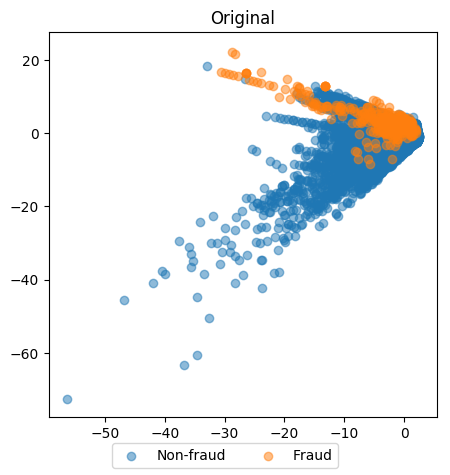

In [28]:
# The scatter plot for V1 and V2 on the training data without resampling 
illustration(X_train_total, y_train_total, 'Original')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,precision_score,classification_report
import matplotlib.pyplot as plt

In [30]:
# Function to undersample the Non-frauds in Training
def Under_sample(Num_samples):
    
    # Indices of the non-frauds
    normal_indices_train = y_train_total[y_train_total.Class == 0].index
    
    train_indices_list = []
    
    for i in range(Num_samples):
        # Randomly select number_records_fraud from non-frauds
        random_normal_indices = np.random.choice(normal_indices_train, number_records_fraud_train,
                                                 replace = False)
        
        # Append the fraud with non-fraud indices
        under_sample_indices = np.concatenate([fraud_indices_train,random_normal_indices])
        train_indices_list.append(under_sample_indices)
        
        # Update normal_indices_train to remove the selectd ones 
        for i in range(len(random_normal_indices)):
            normal_indices_train = normal_indices_train[normal_indices_train != random_normal_indices[i]]
    
    return(train_indices_list)

In [31]:
#Cross-validation 

def cv_score(clf, x, y):
    result_recall = 0
    nfold = 5
    i = 0
    # split data into 5 train/val groups with shuffle
    for train, val in KFold(nfold, shuffle=True).split(x): 
        i += 1
        
        clf.fit(x.iloc[train,:], y.iloc[train,:].values.ravel()) # fit
        y_pred = clf.predict(x.iloc[val,:]) #predict
        
        result_recall += recall_score(y.iloc[val,:].values.ravel(), y_pred) # evaluate recall score on hold-out data   
    return result_recall/nfold # average

In [32]:
#Select the best regularization parameter for logistic regression based on cross-validaion

def logistic_regression(X, y):
    
    Cs = [0.01, 0.1, 1, 10, 100]  #candidates for regularization parameter
    max_score = 0
    C_max = 0
    
    for c in Cs:
        clf_c = LogisticRegression(C=c)
        recall_c = cv_score(clf_c, X, y)  #run cross-validation
        
        if recall_c > max_score:
            max_score = recall_c
            C_max = c
            
    return max_score, C_max


In [33]:
#Prints and plots the confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #print("Normalized confusion matrix")
    else:
        1    #print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

# Baseline Approach (No resampling)

## Logistic Regression

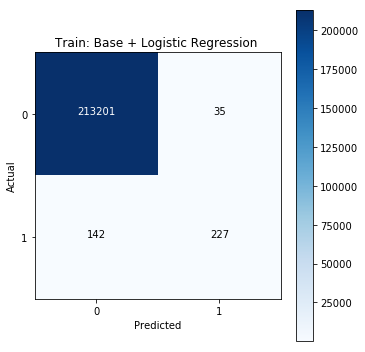

Recall Score Train:  0.615176151762
Precision Score Train:  0.86641221374
True Negative Rate Train:  0.999835862612


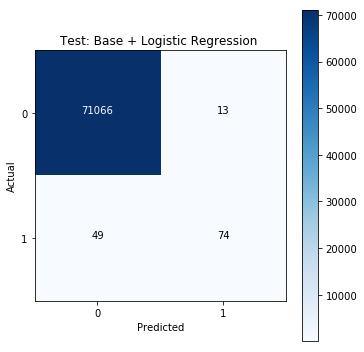

Recall Score Test:  0.60162601626
Precision Score Test:  0.850574712644
True Negative Rate Test:  0.999817104911


In [39]:
#Logistic Regression

# Train a logistic regression with best hyperparamer on the original training set
max_score, C_max = logistic_regression(X_train_total, y_train_total)

# Evaluate the classifer on training data
clf_best_c = LogisticRegression(C=C_max)
clf_best_c.fit(X_train_total, y_train_total.values.ravel())
y_base_log_train = clf_best_c.predict(X_train_total)

# Compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train_total.values.ravel(), y_base_log_train)
np.set_printoptions(precision=2)

Base_log_train.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Train: Base + Logistic Regression ')
plt.show()

print("Recall Score Train: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score Train: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate Train: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))



# Evaluate the classifer on test data
y_base_log_test = clf_best_c.predict(X_test)

# Compute confusion matrix for test data
cnf_matrix = confusion_matrix(y_true, y_base_log_test)
np.set_printoptions(precision=2)

Base_log_test.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))


# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Test: Base + Logistic Regression ')
plt.show()

print("Recall Score Test: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score Test: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate Test: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

In [40]:
Base_log_test

[(0.64227642276422769, 0.85869565217391308, 0.9998171049114366),
 (0.61788617886178865, 0.89411764705882357, 0.9998733803233022),
 (0.65040650406504064, 0.86956521739130432, 0.999831173764403),
 (0.64227642276422769, 0.86813186813186816, 0.999831173764403),
 (0.60162601626016265, 0.85057471264367812, 0.9998171049114366)]

In [41]:
Base_log_train

[(0.6449864498644986, 0.89811320754716983, 0.99987337972950163),
 (0.6449864498644986, 0.875, 0.999840552251965),
 (0.62330623306233057, 0.87121212121212122, 0.999840552251965),
 (0.60433604336043356, 0.86100386100386095, 0.99983117297266877),
 (0.61517615176151763, 0.86641221374045807, 0.99983586261231683)]

## Random Forest

In [34]:
#Function to train random forest and select num_estimators based on out-of-bag recall
def random_forest(X, y, seed=0):
    
    min_estimators = 40
    max_estimators = 50
    num_estimators_best = 0
    max_score, precision_i = 0, 0
    
    rf_try = RandomForestClassifier(warm_start=True, oob_score=True, max_features="sqrt", random_state=seed)
    
    for i in range(min_estimators, max_estimators + 1):
        rf_try.set_params(n_estimators=i)
        
        #Evluate on oob
        rf_try.fit(X, y.values.ravel())
        y_pred_oob = np.argmax(rf_try.oob_decision_function_, axis=1)  #majority vote 
        oob_recall = recall_score(y.values.ravel(), y_pred_oob)       #Out-of-bag recall
        oob_precsion = precision_score(y.values.ravel(), y_pred_oob)  #Out-of-bag precision
        
        if oob_recall > max_score:
            max_score = oob_recall
            precision_i = oob_precsion
            num_estimators_best = i
            
    return max_score, precision_i, num_estimators_best

In [35]:
# Train random forest on the original training set
seed = 123
recall_rf, precision_rf, num_estimators_best = random_forest(X_train_total, y_train_total, seed)
Base_rf_train.append((recall_rf, precision_rf))  #OOB performance

In [37]:
Base_rf_train

[(0.7994579945799458, 0.9546925566343042),
 (0.7940379403794038, 0.948220064724919),
 (0.7886178861788617, 0.9572368421052632),
 (0.7859078590785907, 0.9539473684210527),
 (0.7696476964769647, 0.9435215946843853)]

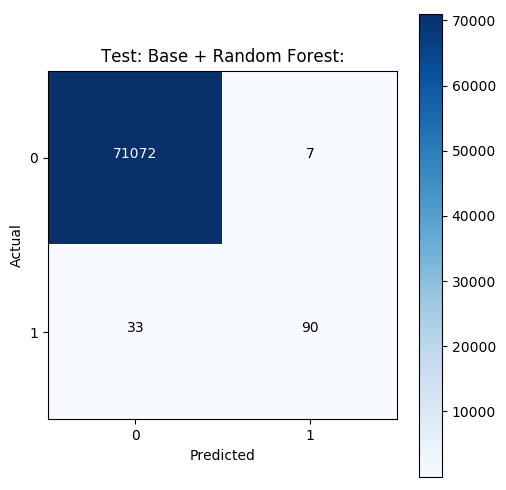

Recall Score Test:  0.731707317073
Precision Score Test:  0.927835051546
True Negative Rate Test:  0.999901518029


In [38]:
#The best RF is obtained using num_estimators_best
RF_best = RandomForestClassifier(n_estimators=num_estimators_best, max_features='sqrt', oob_score=True, random_state=seed)
RF_best.fit(X_train_total, y_train_total.values.ravel())

#predict on test set
y_pred_base_rf = RF_best.predict(X_test)

# Compute confusion matrix for test data
cnf_matrix = confusion_matrix(y_true, y_pred_base_rf)
np.set_printoptions(precision=2)

Base_rf_test.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))


# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Test: Base + Random Forest:')
plt.show()

print("Recall Score Test: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score Test: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate Test: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

In [40]:
Base_rf_test 

[(0.7317073170731707, 0.9278350515463918, 0.9999015180292351),
 (0.7317073170731707, 0.9278350515463918, 0.9999015180292351),
 (0.7235772357723578, 0.9468085106382979, 0.9999296557351679),
 (0.8130081300813008, 0.9009009009009009, 0.9998452426173694),
 (0.7886178861788617, 0.941747572815534, 0.9999155868822015)]

# Undersampling

# Logistic Regression with Undersampling

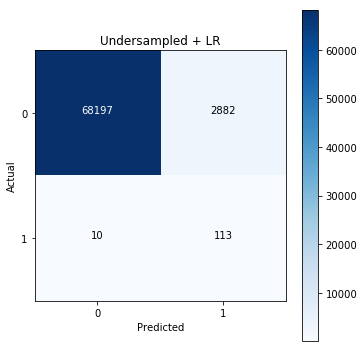

Recall:  0.918699186992
Precisiont:  0.0377295492487
True Negative Rate:  0.959453565751


In [115]:
Num_of_samples = 20

#run previously defined function Under_sample to take indices of all frauds and the same number of non-frauds
Training_indices = Under_sample(Num_of_samples)  

Recall_C, Best_C = [], []

for indices in Training_indices:
    #1st: obtain each under-sampled training set using train indices
    X_train_undersample = X_train_total.loc[indices, :]
    y_train_undersample = y_train_total.loc[indices, :]
    
    #2nd: train a classifier for the current under-sampled training set by cross-validation    
    max_score, C_max = logistic_regression(X_train_undersample, y_train_undersample)
    Recall_C.append(max_score)  
    Best_C.append(C_max)
    
# Fit each classifer on each undersampled training set with the associated best C
Y_pred_list, train_recall, train_precision = [], [], []

for i in range(Num_of_samples):
    X_train_undersample = X_train_total.loc[Training_indices[i], :]
    y_train_undersample = y_train_total.loc[Training_indices[i], :]
    
    clf_best_c = LogisticRegression(C = Best_C[i])
    clf_best_c.fit(X_train_undersample, y_train_undersample.values.ravel()) # fit
    
    #Evluate on training
    y_pred_train = clf_best_c.predict(X_train_undersample)
    train_recall.append(recall_score(y_train_undersample.values.ravel(), y_pred_train))
    train_precision.append(precision_score(y_train_undersample.values.ravel(), y_pred_train))    
    
    #Predict on test
    y_pred = clf_best_c.predict(X_test) #predict
    Y_pred_list.append(y_pred) #append to the list of predictions

# Avg training performacne on all undersampled sets
U_log_train.append((np.mean(train_recall), np.mean(train_precision)))
    
# put together all predictions on test data 
Pred_all_array = np.asarray(Y_pred_list)
P_total = np.sum(Pred_all_array, axis=0)
    
# Produce the final predict from the list of predictions 
Pred_final = np.where(P_total<10, 0, 1)

# Compute confusion matrix for test performance
cnf_matrix = confusion_matrix(y_true, Pred_final)
np.set_printoptions(precision=2)

# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Undersampled + LR')
plt.show()

U_log.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precisiont: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

In [116]:
U_log_train

[(0.92398373983739845, 0.96881034500586305),
 (0.92981029810298088, 0.97341221437752645),
 (0.93197831978319756, 0.97334334040999959),
 (0.94241192411924113, 0.96737229540858127),
 (0.92398373983739845, 0.96763488195179159)]

In [117]:
U_log

[(0.91056910569105687, 0.038043478260869568, 0.96015700839910523),
 (0.90243902439024393, 0.045158665581773796, 0.96698040208781777),
 (0.88617886178861793, 0.046049852133502323, 0.96823253000182896),
 (0.86178861788617889, 0.03633870414809736, 0.96045245431140003),
 (0.91869918699186992, 0.037729549248747912, 0.95945356575078433)]

# Train Random Forest with Undersampling

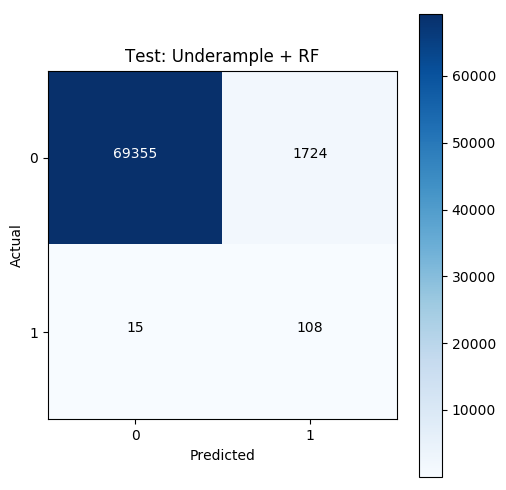

In [95]:
Num_of_samples = 20

Training_indices = Under_sample(Num_of_samples)

Recall_RF, Precision_RF, Best_num_estimators = [], [], []

Y_pred_rf_list, train_recall, train_precision = [], [], []
seed = 123

for indices in Training_indices:
    
    #1st: obtain each under-sampled training set using train indices
    X_train_undersample = X_train_total.loc[indices, :]
    y_train_undersample = y_train_total.loc[indices, :]
    
    #2nd: train a classifier for the current under-sampled training set by best oob recall
    # Train a random forest on the 50-50 training set
    recall_undersample, precision_undersample, num_estimators_best = random_forest(X_train_undersample, 
                                                                                   y_train_undersample,
                                                                                   seed)
    Recall_RF.append(recall_undersample)    
    Precision_RF.append(precision_undersample)
    Best_num_estimators.append(num_estimators_best)
    
    #3th: the RF with the optimal n_estimators
    RF_i = RandomForestClassifier(n_estimators=num_estimators_best, max_features='sqrt', oob_score=True, random_state=seed)
    RF_i.fit(X_train_undersample, y_train_undersample.values.ravel()) 
    
    #4th: predict on test
    y_pred_rf = RF_i.predict(X_test) #predict
    Y_pred_rf_list.append(y_pred_rf) #append to the list of predictions

#record average oob recall and precsion for all RF's
U_rf_train.append((np.mean(Recall_RF), np.mean(Precision_RF)))    
    
# Put all predictions together
Pred_rf_array = np.asarray(Y_pred_rf_list)
P_rf_total = np.sum(Pred_rf_array, axis=0)

# Produce the final predict from the list of predictions by majority voting
Pred_rf_final = np.where(P_rf_total<10, 0, 1)

# Compute confusion matrix for test performance
cnf_matrix = confusion_matrix(y_true, Pred_rf_final)
np.set_printoptions(precision=2)

# Plot confusion matrix
class_names = [0,1]
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Test: Underample + RF')
plt.show()

U_RF.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

In [98]:
U_rf_train

[(0.9074525745257453, 0.9658665812855487),
 (0.9128726287262872, 0.9663185258164614),
 (0.9186991869918698, 0.9656309917637704),
 (0.9077235772357722, 0.9654787505739695),
 (0.9067750677506774, 0.9652980478304153)]

In [100]:
U_RF

[(0.8861788617886179, 0.059955995599559955, 0.9759563302803922),
 (0.8861788617886179, 0.049771689497716896, 0.9707227169768848),
 (0.8617886178861789, 0.045689655172413794, 0.9688515595323514),
 (0.8861788617886179, 0.052580800771828265, 0.9723687727739557),
 (0.8861788617886179, 0.05151228733459357, 0.9717638120963997)]

# Over-sampling

In [42]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

# Random Oversampling

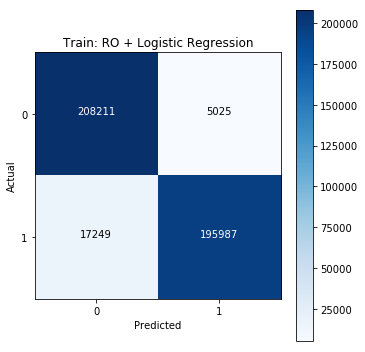

Recall Score Train:  0.91910840571
Precision Score Train:  0.975001492448
True Negative Rate Train:  0.976434560768


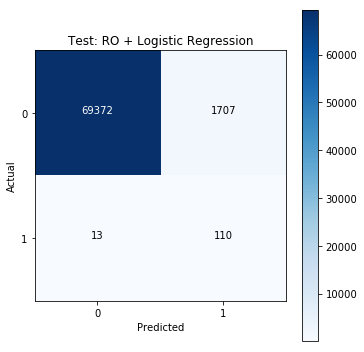

Recall Score in the testing dataset:  0.894308943089
Precision Score in the testing dataset:  0.0605393505779
True Negative Rate in the testing dataset:  0.975984467986


In [77]:
#Naive random over-sampling

Random_Over_Sample = RandomOverSampler(random_state=0)
X_resampled_train, y_resampled_train = Random_Over_Sample.fit_sample(X_train_total, 
                                                         y_train_total.values.ravel())

X_resampled_train_df = pd.DataFrame(X_resampled_train, columns=X_train_total.columns)
y_resampled_train_df = pd.DataFrame(y_resampled_train, columns=y_train_total.columns)

# Train a logistic regression on the new randomly over-sampled training set
max_score, C_max = logistic_regression(X_resampled_train_df, y_resampled_train_df)

# Evaluate the classifer on training data
clf_best_c = LogisticRegression(C=C_max)
clf_best_c.fit(X_resampled_train_df, y_resampled_train_df.values.ravel())
y_ro_log_train = clf_best_c.predict(X_resampled_train_df)

# Compute confusion matrix for training performance
cnf_matrix = confusion_matrix(y_resampled_train_df.values.ravel(), y_ro_log_train)
np.set_printoptions(precision=2)

RO_log_train.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

# Plot confusion matrix for training performance
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Train: RO + Logistic Regression')
plt.show()

print("Recall Score Train: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score Train: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate Train: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))


# Evaluate the classifer on test data
y_pred_RanOverSample = clf_best_c.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_RanOverSample)
np.set_printoptions(precision=2)

RO_log.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))


# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Test: RO + Logistic Regression')
plt.show()

print("Recall Score in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate in the testing dataset: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

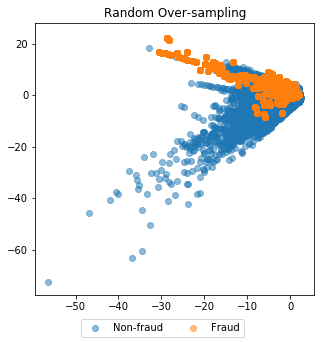

In [45]:
illustration(X_resampled_train_df, y_resampled_train_df, "Random Over-sampling")

In [78]:
RO_log_train

[(0.92396218274587782, 0.97625052647226418, 0.97752255716670733),
 (0.92197846517473603, 0.97746256189964797, 0.97874186347521053),
 (0.93842034178093758, 0.97603148976436327, 0.97695511076928854),
 (0.92244742913954492, 0.97461624599894958, 0.97597497608283779),
 (0.91910840571010521, 0.97500149244821199, 0.97643456076835056)]

In [79]:
RO_log

[(0.90243902439024393, 0.063903281519861826, 0.97712404507660489),
 (0.87804878048780488, 0.067669172932330823, 0.97906554678597058),
 (0.86178861788617889, 0.058145913329676356, 0.9758437794566609),
 (0.91056910569105687, 0.059957173447537475, 0.9752950941909706),
 (0.89430894308943087, 0.060539350577875621, 0.9759844679863251)]

# Synthetic Minority Oversampling Technique (SMOTE)

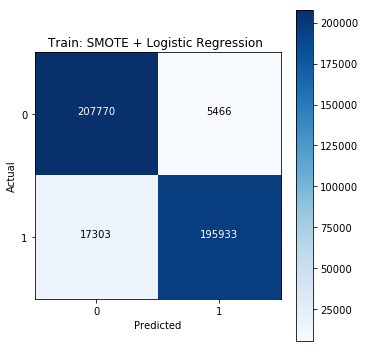

Recall Score Train:  0.918855165169
Precision Score Train:  0.972859845382
True Negative Rate Train:  0.974366429684


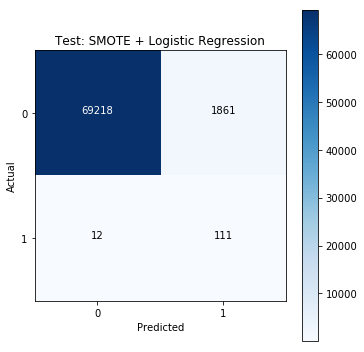

Recall Score in the testing dataset:  0.90243902439
Precision Score in the testing dataset:  0.0562880324544
True Negative Rate in the testing dataset:  0.973817864629


In [80]:
#SMOTE
X_SMOTE_train, y_SMOTE_train = SMOTE().fit_sample(X_train_total,
                                              y_train_total.values.ravel())

X_SMOTE_train_df = pd.DataFrame(X_SMOTE_train, columns=X_train_total.columns)
y_SMOTE_train_df = pd.DataFrame(y_SMOTE_train, columns=y_train_total.columns)

# Train a logistic regression on the new SMOTE training set
max_score, C_max = logistic_regression(X_SMOTE_train_df, y_SMOTE_train_df)

# Evaluate the classifer on training data
clf_best_smote = LogisticRegression(C=C_max)
clf_best_smote.fit(X_SMOTE_train_df, y_SMOTE_train_df.values.ravel())
y_SMOTE_log_train = clf_best_smote.predict(X_SMOTE_train_df)

# Compute confusion matrix for training performance
cnf_matrix = confusion_matrix(y_SMOTE_train_df.values.ravel(), y_SMOTE_log_train)
np.set_printoptions(precision=2)

SMOTE_log_train.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

# Plot confusion matrix for training performance
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Train: SMOTE + Logistic Regression ')
plt.show()

print("Recall Score Train: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score Train: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate Train: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))


# Evaluate the classifer on test data
y_pred_SMOTE = clf_best_smote.predict(X_test)

# Compute confusion matrix for test performance
cnf_matrix = confusion_matrix(y_true, y_pred_SMOTE)
np.set_printoptions(precision=2)

SMOTE_log.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

# Plot non-normalized confusion matrix for test performance
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Test: SMOTE + Logistic Regression')
plt.show()

print("Recall Score in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate in the testing dataset: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

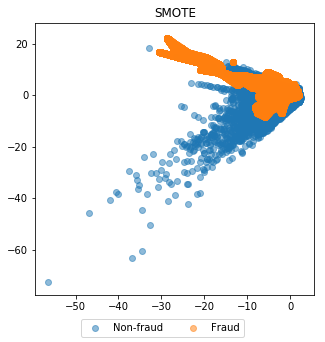

In [53]:
illustration(X_SMOTE_train_df, y_SMOTE_train_df, "SMOTE")

In [81]:
SMOTE_log_train

[(0.920196402108462, 0.974284749600294, 0.9757123562625448),
 (0.9231977714832392, 0.9753510310453145, 0.9766690427507551),
 (0.9382421354743101, 0.974401309156792, 0.9753512540096418),
 (0.9177108930949746, 0.9727495513766895, 0.9742913954491736),
 (0.9188551651691084, 0.972859845381556, 0.9743664296835431)]

In [82]:
SMOTE_log

[(0.90243902439024393, 0.059358288770053474, 0.97525288763207141),
 (0.86991869918699183, 0.062573099415204683, 0.97744762869483248),
 (0.86178861788617889, 0.05478036175710594, 0.97426806792442211),
 (0.91869918699186992, 0.055802469135802467, 0.97310035312820942),
 (0.90243902439024393, 0.056288032454361057, 0.97381786462949671)]

# Adaptive Synthetic (ADASYN)

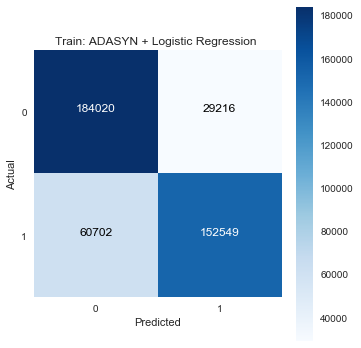

Recall Score Train:  0.715349517704
Precision Score Train:  0.839264985008
True Negative Rate Train:  0.862987488041


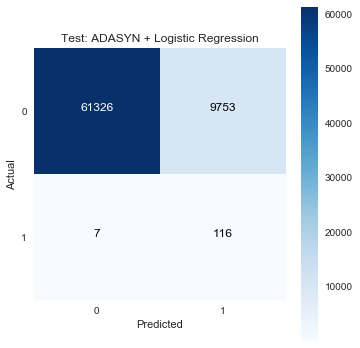

Recall Score in the testing dataset:  0.943089430894
Precision Score in the testing dataset:  0.0117539771
True Negative Rate in the testing dataset:  0.862786477019


In [22]:
#ADASYN
X_ADASYN_train, y_ADASYN_train = ADASYN().fit_sample(X_train_total,
                                              y_train_total.values.ravel())

X_ADASYN_train_df = pd.DataFrame(X_ADASYN_train, columns=X_train_total.columns)
y_ADASYN_train_df = pd.DataFrame(y_ADASYN_train, columns=y_train_total.columns)

# Train a logistic regression on the new ADASYN training set
max_score, C_max = logistic_regression(X_ADASYN_train_df, y_ADASYN_train_df)

# Evaluate the classifer on training data
clf_best_adasyn = LogisticRegression(C=C_max)
clf_best_adasyn.fit(X_ADASYN_train_df, y_ADASYN_train_df.values.ravel())
y_ADASYN_log_train = clf_best_adasyn.predict(X_ADASYN_train_df)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_ADASYN_train_df.values.ravel(), y_ADASYN_log_train)
np.set_printoptions(precision=2)

ADASYN_log_train.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
             cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
             cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Train: ADASYN + Logistic Regression ')
plt.show()

print("Recall Score Train: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score Train: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate Train: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))


# Evaluate the classifer on test data
#clf_best_adasyn = LogisticRegression(C=C_max)
#clf_best_adasyn.fit(X_ADASYN_train_df, y_ADASYN_train_df.values.ravel())
y_pred_ADASYN = clf_best_adasyn.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_ADASYN)
np.set_printoptions(precision=2)

ADASYN_log.append((cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),
                          cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]),
                          cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Test: ADASYN + Logistic Regression')
plt.show()

print("Recall Score in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision Score in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("True Negative Rate in the testing dataset: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

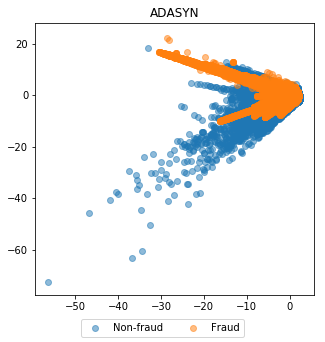

In [60]:
illustration(X_ADASYN_train_df, y_ADASYN_train_df, 'ADASYN')

In [84]:
ADASYN_log_train

[(0.71572935179670905, 0.83937812436412829, 0.86302969479825176),
 (0.7319652412059594, 0.85352982993383275, 0.87438800202592437),
 (0.73055189522009689, 0.84937436959899681, 0.87043932544223301),
 (0.72034518337866993, 0.82636322061711454, 0.84865125963720944),
 (0.71745562823849385, 0.84734583114114026, 0.87073477274006261)]

In [85]:
ADASYN_log

[(0.94308943089430897, 0.011770674784373415, 0.86298344096005852),
 (0.94308943089430897, 0.01283043911071784, 0.87443548727472253),
 (0.89430894308943087, 0.011645140800338767, 0.86865318870552488),
 (0.97560975609756095, 0.010879419764279238, 0.84650881413638346),
 (0.95934959349593496, 0.012689536509302076, 0.87083386091531956)]